### Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import inflection
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings("ignore")

### Leitura da base e tratamento dos dados

In [2]:
#leitura d abase
df = pd.read_csv('../../datasets/raw/training_data.csv', sep=';')
print(f'Shape da base: {df.shape}')
df.head()

Shape da base: (1176, 35)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,25,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,Female,62,3,2,Manufacturing Director,3,Married,4898,7505,0,Y,No,12,3,4,80,2,5,3,3,4,2,1,2,0
1,44,Travel_Rarely,1376,Human Resources,1,2,Medical,1,1098,2,Male,91,2,3,Human Resources,1,Married,10482,2326,9,Y,No,14,3,4,80,1,24,1,3,20,6,3,6,1
2,27,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1,1405,4,Female,51,3,1,Research Scientist,3,Single,2394,25681,1,Y,Yes,13,3,4,80,0,8,2,3,8,2,7,7,1
3,40,Travel_Frequently,580,Sales,5,4,Life Sciences,1,729,4,Male,48,2,3,Sales Executive,1,Married,10475,23772,5,Y,Yes,21,4,3,80,1,20,2,3,18,13,1,12,0
4,24,Travel_Rarely,477,Research & Development,24,3,Medical,1,1173,4,Male,49,3,1,Laboratory Technician,2,Single,3597,6409,8,Y,No,22,4,4,80,0,6,2,3,4,3,1,2,0


In [3]:
#padronizando nomes de colunas-> snake_case
df.columns = df.columns.map(lambda x: inflection.underscore(x))
print(f'Nomes das colunas após padronização: {df.columns}')

Nomes das colunas após padronização: Index(['age', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager', 'attrition'],
      dtype='object')


In [4]:
# Verifica se há colunas com apenas um tipo de valor e ID do empregado
colunas_para_eliminar = ['employee_number']
for coluna in df.columns:
    if df[coluna].nunique() == 1:
        colunas_para_eliminar.append(coluna)       
# Elimina as colunas com apenas um tipo de valor
df = df.drop(colunas_para_eliminar, axis=1)
print(f'Colunas eliminadas: {colunas_para_eliminar}')

Colunas eliminadas: ['employee_number', 'employee_count', 'over18', 'standard_hours']


In [5]:
#overview do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1176 non-null   int64 
 1   business_travel             1176 non-null   object
 2   daily_rate                  1176 non-null   int64 
 3   department                  1176 non-null   object
 4   distance_from_home          1176 non-null   int64 
 5   education                   1176 non-null   int64 
 6   education_field             1176 non-null   object
 7   environment_satisfaction    1176 non-null   int64 
 8   gender                      1176 non-null   object
 9   hourly_rate                 1176 non-null   int64 
 10  job_involvement             1176 non-null   int64 
 11  job_level                   1176 non-null   int64 
 12  job_role                    1176 non-null   object
 13  job_satisfaction            1176 non-null   int6

In [6]:
# Convertendo as colunas do tipo 'object' para 'category'
df = df.astype({col: 'category' for col in df.select_dtypes('object').columns})

### Análise Exploratória dos Dados

#### Geral

In [7]:
#Avaliando info de dados categóricos
df.describe(include='category').T

,count,unique,top,freq
business_travel,1176,3,Travel_Rarely,828
department,1176,3,Research & Development,764
education_field,1176,6,Life Sciences,472
gender,1176,2,Male,704
job_role,1176,9,Sales Executive,263
marital_status,1176,3,Married,535
over_time,1176,2,No,853


In [8]:
#Avaliando info de dados NÃO categóricos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1176.0,36.964286,9.148817,18.0,30.00,36.0,43.00,60.0
daily_rate,1176.0,801.496599,400.618020,102.0,468.25,801.5,1157.25,1499.0
distance_from_home,1176.0,9.097789,8.002540,1.0,2.00,7.0,14.00,29.0
education,1176.0,2.917517,1.022720,1.0,2.00,3.0,4.00,5.0
environment_satisfaction,1176.0,2.728741,1.096404,1.0,2.00,3.0,4.00,4.0
hourly_rate,1176.0,65.398810,20.289856,30.0,48.00,65.0,83.00,100.0
job_involvement,1176.0,2.725340,0.708781,1.0,2.00,3.0,3.00,4.0
job_level,1176.0,2.071429,1.118510,1.0,1.00,2.0,3.00,5.0
job_satisfaction,1176.0,2.739796,1.109486,1.0,2.00,3.0,4.00,4.0
monthly_income,1176.0,6562.642007,4780.847303,1009.0,2870.00,4968.0,8500.00,19973.0


In [9]:
#Obtendo numero de pessoas que pediram demissão
print(f"{df['attrition'].value_counts()[1]} pessoas pediram demissão e {df['attrition'].value_counts()[0]} pessoas não pediram.")

190 pessoas pediram demissão e 986 pessoas não pediram.


#### Ánalise dos dados númericos

In [10]:
def gerar_info_basica(col):    
    # Agrupar por attrition e calcular a média
    media = df.groupby('attrition')[col].mean()
    # Agrupar por attrition e calcular a mediana
    mediana = df.groupby('attrition')[col].median()
    # Agrupar por attrition e calcular a moda
    moda = df.groupby('attrition')[col].apply(lambda x: x.value_counts().index[0])
    # Arredondar as médias para duas casas decimais
    media = media.round(2)
    # Arredondar as mediana para duas casas decimais
    mediana = mediana.round(2)
    # Mostrar a média dos funcionários que não se demitiram e dos que se demitiram
    print(f"Média de {col} dos funcionários que não se demitiram:", media[0])
    print(f"Média de {col} dos funcionários que se demitiram:", media[1])
    # Mostrar a mediana dos funcionários que não se demitiram e dos que se demitiram
    print(f"Mediana de {col} dos funcionários que não se demitiram:", mediana[0])
    print(f"Mediana de {col} dos funcionários que se demitiram:", mediana[1])
    # Mostrar a moda 
    print(f"Moda de {col} dos funcionários que não se demitiram:", moda[0])
    print(f"Moda de {col} dos funcionários que se demitiram:", moda[1])

In [11]:
#fução pra plotar o histograma
def plot_histogram(df, column, hue='attrition'):
    plt.figure(figsize=(10,6))
    hist = sns.histplot(data=df, x=column, hue=hue, kde=True, bins=10)
    plt.title(f'Distribuição de {column} dos funcionários que saíram e dos que não saíram')

    ages = []
    for patch in hist.patches:
        height = patch.get_height()
        if height > 0:
            age = patch.get_x()
            ages.append(age)
            hist.annotate(f'{height:.0f}', (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom')

In [12]:
#Colunas númericas e sem dados categóricos
cols = [col for col in df.select_dtypes(include=['number']).columns if col != 'attrition' and df[col].nunique() > 5]
cols


['age',
 'daily_rate',
 'distance_from_home',
 'hourly_rate',
 'monthly_income',
 'monthly_rate',
 'num_companies_worked',
 'percent_salary_hike',
 'total_working_years',
 'training_times_last_year',
 'years_at_company',
 'years_in_current_role',
 'years_since_last_promotion',
 'years_with_curr_manager']

###### Age

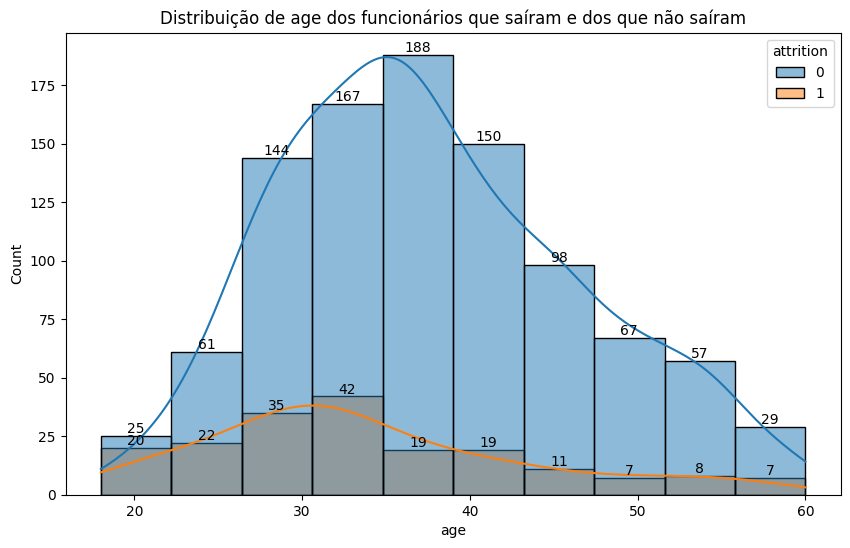

In [13]:
plot_histogram(df,'age')

In [14]:
gerar_info_basica('age')

Média de age dos funcionários que não se demitiram: 37.56
Média de age dos funcionários que se demitiram: 33.86
Mediana de age dos funcionários que não se demitiram: 36.0
Mediana de age dos funcionários que se demitiram: 32.0
Moda de age dos funcionários que não se demitiram: 35
Moda de age dos funcionários que se demitiram: 29


É possível notar que a maior parte dos funcionáriostem idade da faixa de 30-40 anos e também é a faixa de idade em que a maioria dos funcionário pediram demissão. Também pode-se notar que a distribuição assemelha-se a uma normal.

###### Daily_rate

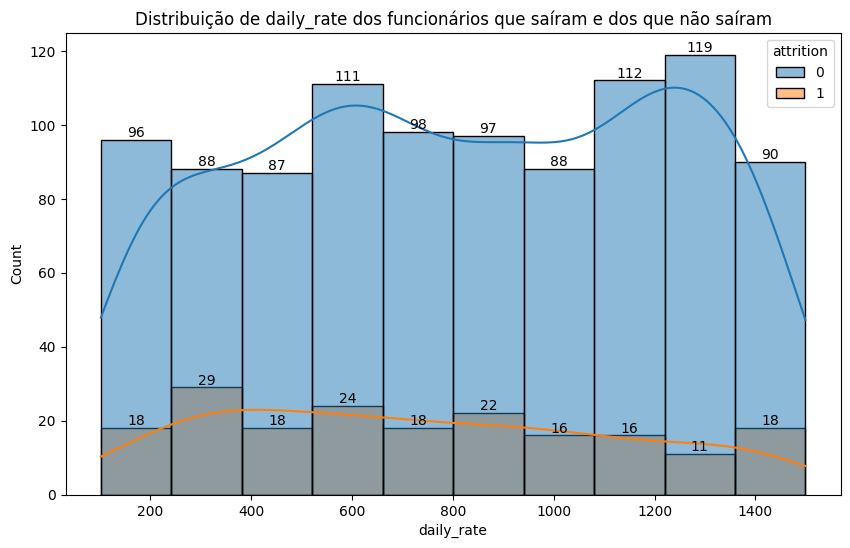

In [15]:
plot_histogram(df,'daily_rate')

In [16]:
gerar_info_basica('daily_rate')

Média de daily_rate dos funcionários que não se demitiram: 813.54
Média de daily_rate dos funcionários que se demitiram: 739.0
Mediana de daily_rate dos funcionários que não se demitiram: 818.0
Mediana de daily_rate dos funcionários que se demitiram: 690.5
Moda de daily_rate dos funcionários que não se demitiram: 691
Moda de daily_rate dos funcionários que se demitiram: 337


É possível notar que os funcionário que se demitiram recebiam, em média, menos dos que os que ficaram.

###### Distance from home

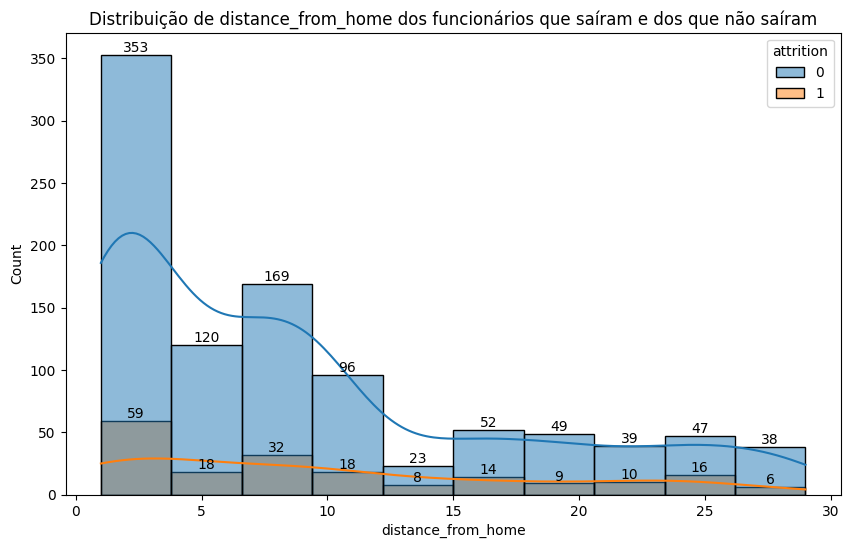

In [17]:
plot_histogram(df,'distance_from_home')

In [18]:
gerar_info_basica('distance_from_home')

Média de distance_from_home dos funcionários que não se demitiram: 8.89
Média de distance_from_home dos funcionários que se demitiram: 10.16
Mediana de distance_from_home dos funcionários que não se demitiram: 7.0
Mediana de distance_from_home dos funcionários que se demitiram: 8.5
Moda de distance_from_home dos funcionários que não se demitiram: 2
Moda de distance_from_home dos funcionários que se demitiram: 2


É possível perceber que o grupo como todo mora perto do trabalho, porém os que se demitiram moravam levemente mais afastado

###### Hourly rate

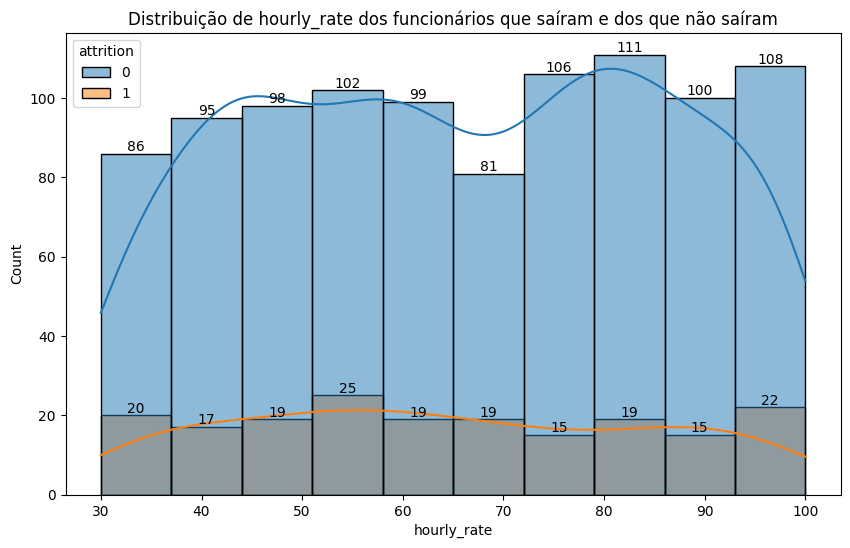

In [19]:
plot_histogram(df,'hourly_rate')

In [20]:
gerar_info_basica('hourly_rate')

Média de hourly_rate dos funcionários que não se demitiram: 65.64
Média de hourly_rate dos funcionários que se demitiram: 64.14
Mediana de hourly_rate dos funcionários que não se demitiram: 66.0
Mediana de hourly_rate dos funcionários que se demitiram: 63.0
Moda de hourly_rate dos funcionários que não se demitiram: 42
Moda de hourly_rate dos funcionários que se demitiram: 66


É possível notar que ao contrário do ganho diário, o ganho horário dos funcionarios é bem similiar

###### Monthly income

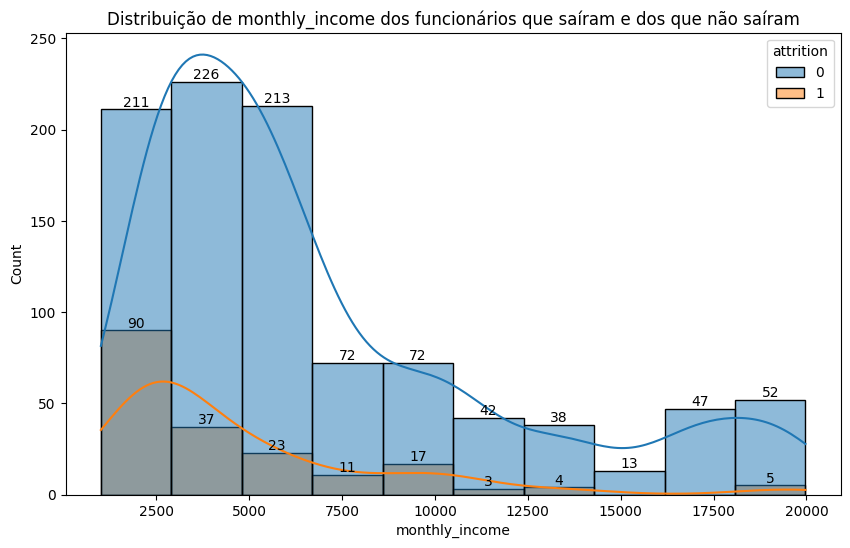

In [21]:
plot_histogram(df,'monthly_income')

In [22]:
gerar_info_basica('monthly_income')

Média de monthly_income dos funcionários que não se demitiram: 6902.86
Média de monthly_income dos funcionários que se demitiram: 4797.1
Mediana de monthly_income dos funcionários que não se demitiram: 5229.5
Mediana de monthly_income dos funcionários que se demitiram: 3007.0
Moda de monthly_income dos funcionários que não se demitiram: 5562
Moda de monthly_income dos funcionários que se demitiram: 2362


Novamente, podemos ver que o ganho mensal dos que se demitiram é bem menor que os que ficaram, e sua distribuição para ambos os públicos é semelhante a uma normal

###### Monthly rate

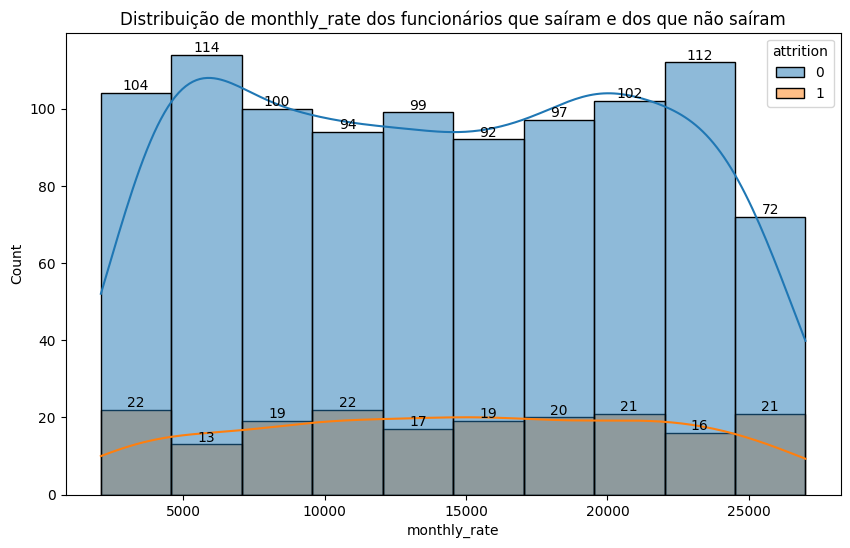

In [23]:
plot_histogram(df,'monthly_rate')

In [24]:
gerar_info_basica('monthly_rate')

Média de monthly_rate dos funcionários que não se demitiram: 14168.87
Média de monthly_rate dos funcionários que se demitiram: 14615.97
Mediana de monthly_rate dos funcionários que não se demitiram: 13982.5
Mediana de monthly_rate dos funcionários que se demitiram: 14711.0
Moda de monthly_rate dos funcionários que não se demitiram: 25326
Moda de monthly_rate dos funcionários que se demitiram: 9150


Podemos perceber ao notar as colunas de monthly rate e monthly income que talvez existam nas bases de dados tanto funcionários freelancers quanto funcionários fixos, ou funcionários em diferentes regimes de remuneração.

###### Num companies worked

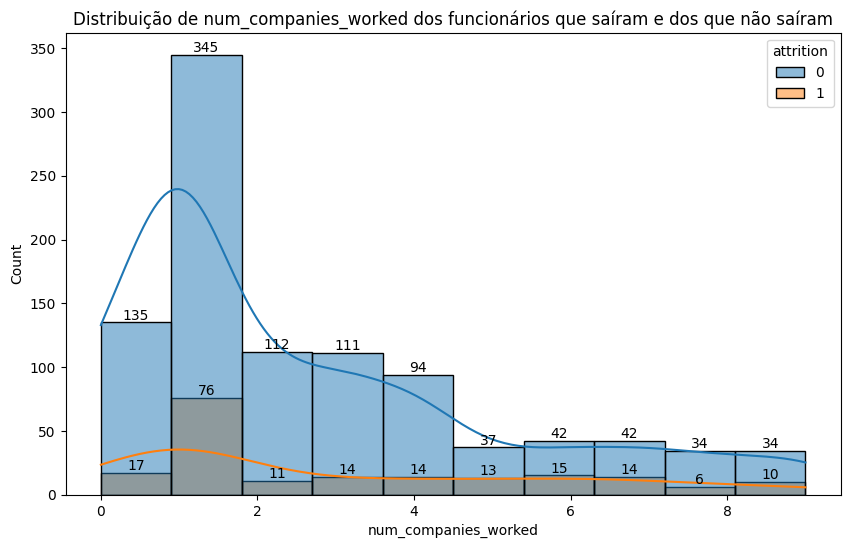

In [25]:
plot_histogram(df,'num_companies_worked')

In [26]:
gerar_info_basica('num_companies_worked')

Média de num_companies_worked dos funcionários que não se demitiram: 2.62
Média de num_companies_worked dos funcionários que se demitiram: 3.09
Mediana de num_companies_worked dos funcionários que não se demitiram: 2.0
Mediana de num_companies_worked dos funcionários que se demitiram: 2.0
Moda de num_companies_worked dos funcionários que não se demitiram: 1
Moda de num_companies_worked dos funcionários que se demitiram: 1


###### Percent salary hike

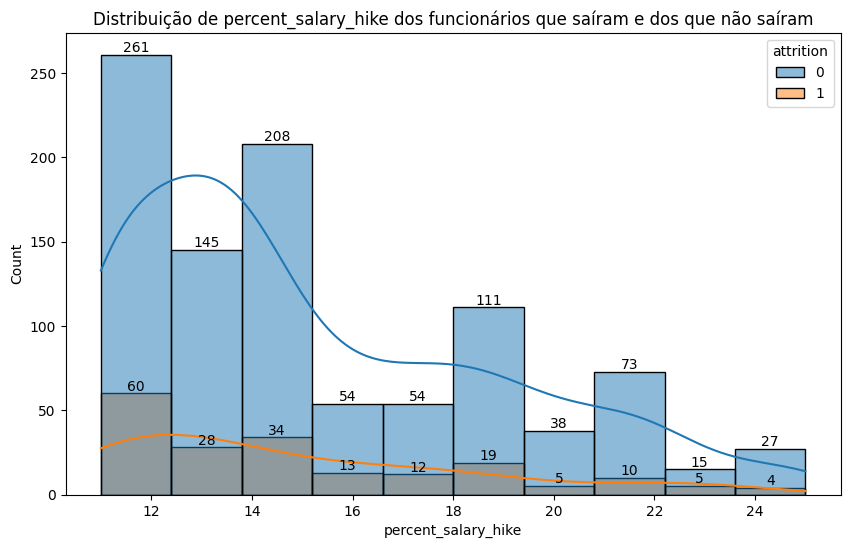

In [27]:
plot_histogram(df,'percent_salary_hike')

In [28]:
gerar_info_basica('percent_salary_hike')

Média de percent_salary_hike dos funcionários que não se demitiram: 15.25
Média de percent_salary_hike dos funcionários que se demitiram: 14.9
Mediana de percent_salary_hike dos funcionários que não se demitiram: 14.0
Mediana de percent_salary_hike dos funcionários que se demitiram: 14.0
Moda de percent_salary_hike dos funcionários que não se demitiram: 13
Moda de percent_salary_hike dos funcionários que se demitiram: 11


Nota-se que funcionários que receberam maiores aumentos permaneceram na empresa e sua distribuição assemelha-se a uma normal

###### Times

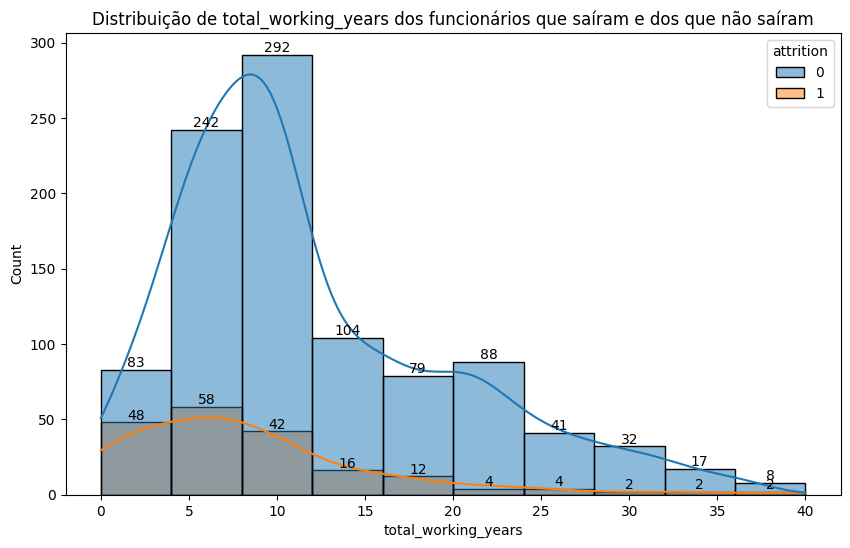

In [29]:
plot_histogram(df,'total_working_years')

In [30]:
gerar_info_basica('total_working_years')

Média de total_working_years dos funcionários que não se demitiram: 11.85
Média de total_working_years dos funcionários que se demitiram: 8.48
Mediana de total_working_years dos funcionários que não se demitiram: 10.0
Mediana de total_working_years dos funcionários que se demitiram: 7.0
Moda de total_working_years dos funcionários que não se demitiram: 10
Moda de total_working_years dos funcionários que se demitiram: 1


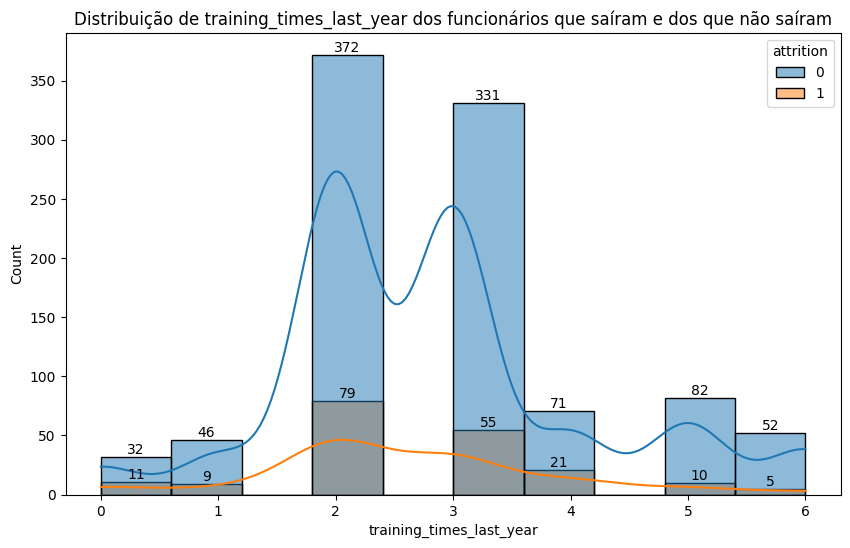

In [31]:
plot_histogram(df,'training_times_last_year')

In [32]:
gerar_info_basica('training_times_last_year')

Média de training_times_last_year dos funcionários que não se demitiram: 2.83
Média de training_times_last_year dos funcionários que se demitiram: 2.61
Mediana de training_times_last_year dos funcionários que não se demitiram: 3.0
Mediana de training_times_last_year dos funcionários que se demitiram: 2.0
Moda de training_times_last_year dos funcionários que não se demitiram: 2
Moda de training_times_last_year dos funcionários que se demitiram: 2


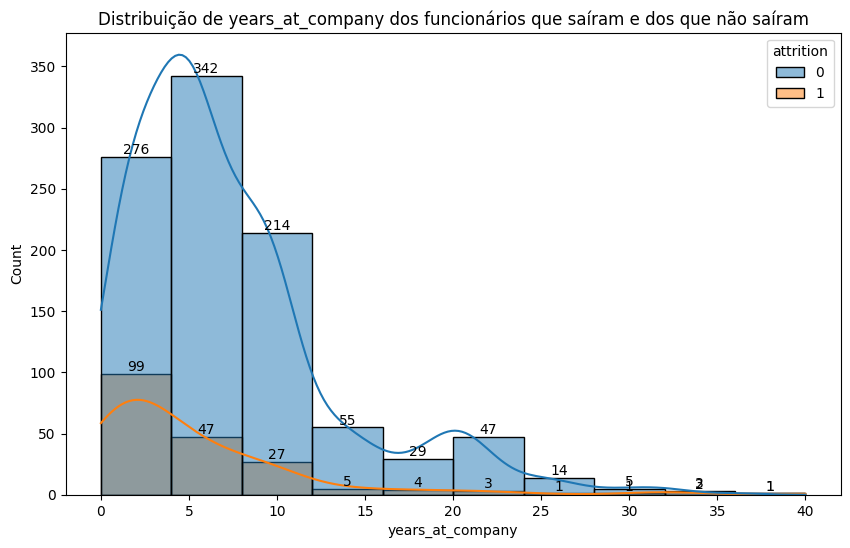

In [33]:
plot_histogram(df,'years_at_company')

In [34]:
gerar_info_basica('years_at_company')

Média de years_at_company dos funcionários que não se demitiram: 7.3
Média de years_at_company dos funcionários que se demitiram: 5.29
Mediana de years_at_company dos funcionários que não se demitiram: 5.0
Mediana de years_at_company dos funcionários que se demitiram: 3.0
Moda de years_at_company dos funcionários que não se demitiram: 5
Moda de years_at_company dos funcionários que se demitiram: 1


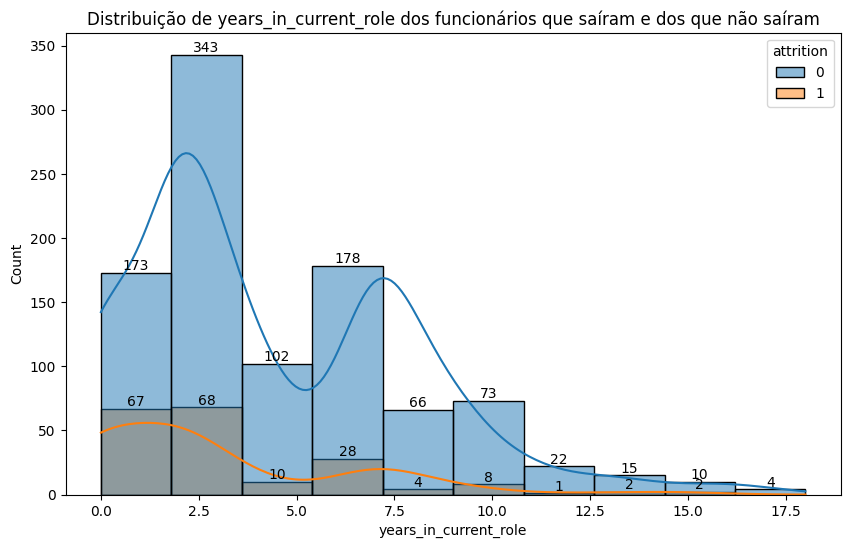

In [35]:
plot_histogram(df,'years_in_current_role')

In [36]:
gerar_info_basica('years_in_current_role')

Média de years_in_current_role dos funcionários que não se demitiram: 4.42
Média de years_in_current_role dos funcionários que se demitiram: 2.97
Mediana de years_in_current_role dos funcionários que não se demitiram: 3.0
Mediana de years_in_current_role dos funcionários que se demitiram: 2.0
Moda de years_in_current_role dos funcionários que não se demitiram: 2
Moda de years_in_current_role dos funcionários que se demitiram: 0


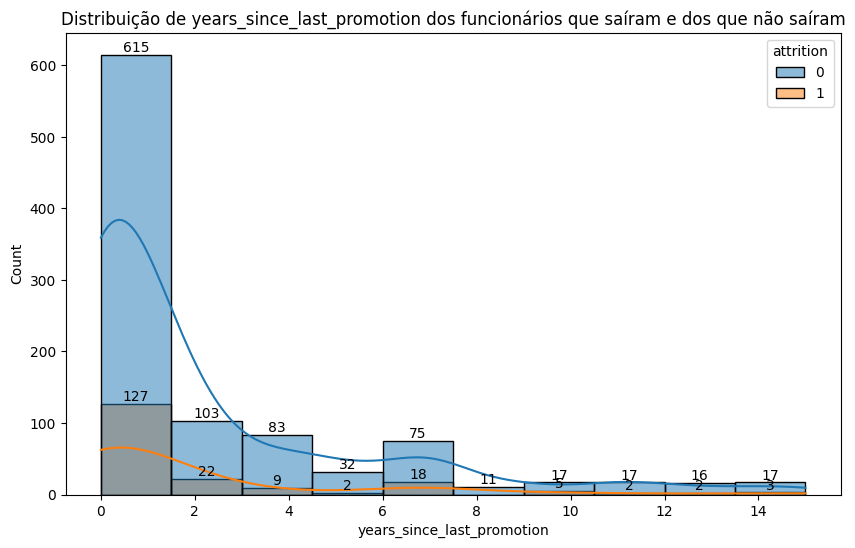

In [37]:
plot_histogram(df,'years_since_last_promotion')

In [38]:
gerar_info_basica('years_since_last_promotion')

Média de years_since_last_promotion dos funcionários que não se demitiram: 2.3
Média de years_since_last_promotion dos funcionários que se demitiram: 2.03
Mediana de years_since_last_promotion dos funcionários que não se demitiram: 1.0
Mediana de years_since_last_promotion dos funcionários que se demitiram: 1.0
Moda de years_since_last_promotion dos funcionários que não se demitiram: 0
Moda de years_since_last_promotion dos funcionários que se demitiram: 0


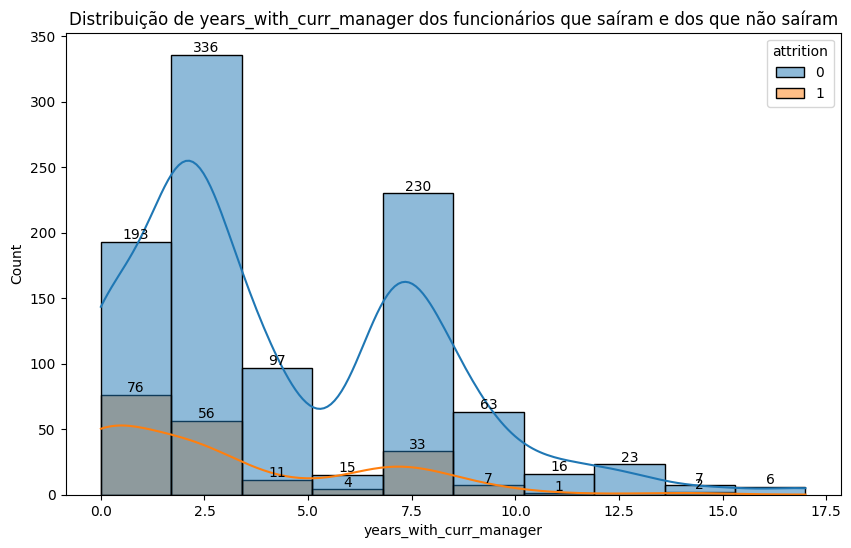

In [39]:
plot_histogram(df,'years_with_curr_manager')

In [40]:
gerar_info_basica('years_with_curr_manager')

Média de years_with_curr_manager dos funcionários que não se demitiram: 4.32
Média de years_with_curr_manager dos funcionários que se demitiram: 2.88
Mediana de years_with_curr_manager dos funcionários que não se demitiram: 3.0
Mediana de years_with_curr_manager dos funcionários que se demitiram: 2.0
Moda de years_with_curr_manager dos funcionários que não se demitiram: 2
Moda de years_with_curr_manager dos funcionários que se demitiram: 0


De forma geral, podemos resumir que quanto mais longo for o período trabalhado, menores a chances do funcionário se demitir

#### Ánalise de dados categóricos

In [41]:
#Colunas categóricas
cols = [col for col in df.columns if df[col].nunique() < 5 or df[col].dtype == 'category']
cols

['business_travel',
 'department',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'over_time',
 'performance_rating',
 'relationship_satisfaction',
 'stock_option_level',
 'work_life_balance',
 'attrition']

##### Info. pessoais

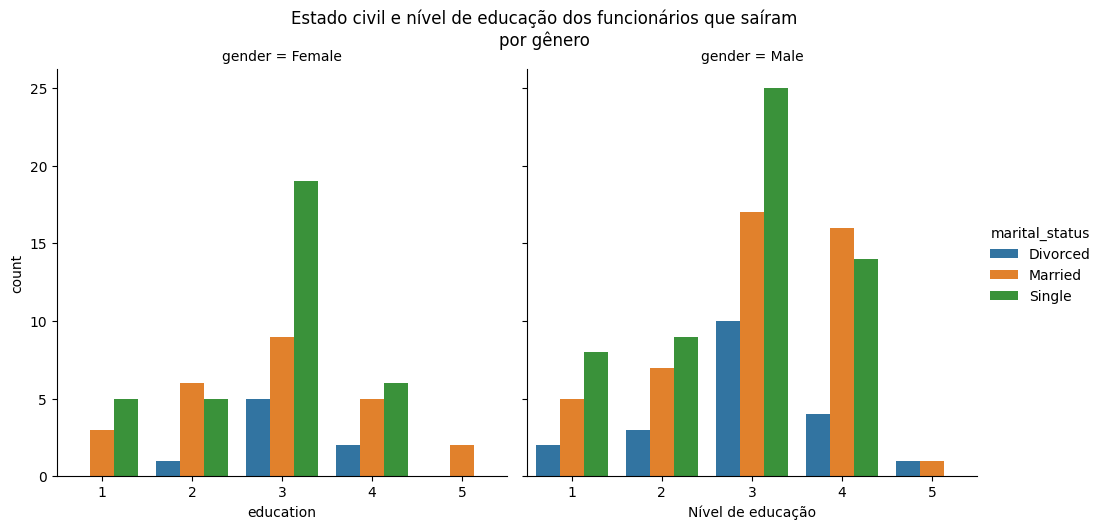

In [42]:
df_attrition = df[df['attrition'] == 1]

sns.catplot(x='education', hue='marital_status', col='gender', data=df_attrition, kind='count')
plt.suptitle('Estado civil e nível de educação dos funcionários que saíram\npor gênero', y=1.05)
plt.xlabel('Nível de educação')
plt.ylabel('Contagem')
plt.show()

> 1 'Below College', 2 'College',3 'Bachelor',4 'Master',5 'Doctor'

Podemos perceber que o grupo de maior evasão é de homens, solteiros e bacharelados

##### Info. satisfação

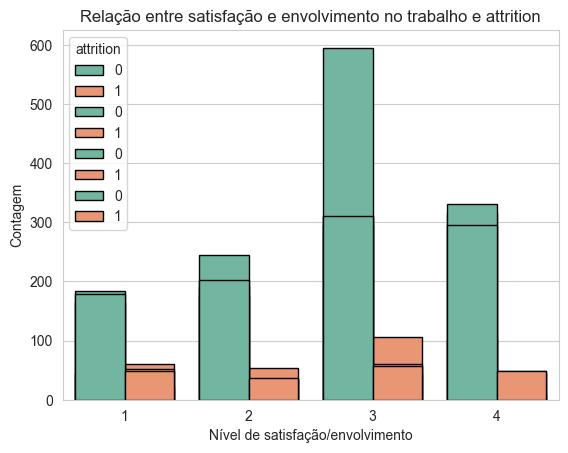

In [43]:
columns = ['environment_satisfaction', 'job_involvement', 'job_satisfaction', 'relationship_satisfaction', 'attrition']
data = df[columns]

sns.set_style('whitegrid')
sns.countplot(data=data, x='environment_satisfaction', hue='attrition', palette='Set2', edgecolor='black')
sns.countplot(data=data, x='job_involvement', hue='attrition', palette='Set2', edgecolor='black')
sns.countplot(data=data, x='job_satisfaction', hue='attrition', palette='Set2', edgecolor='black')
sns.countplot(data=data, x='relationship_satisfaction', hue='attrition', palette='Set2', edgecolor='black')

# Adicionar título e labels aos eixos
plt.title('Relação entre satisfação e envolvimento no trabalho e attrition')
plt.xlabel('Nível de satisfação/envolvimento')
plt.ylabel('Contagem')

plt.show()

Percebe-se que quanto maior  a satisfação e envolvimento, menos funcionários pedem demissão

##### Info. profissional

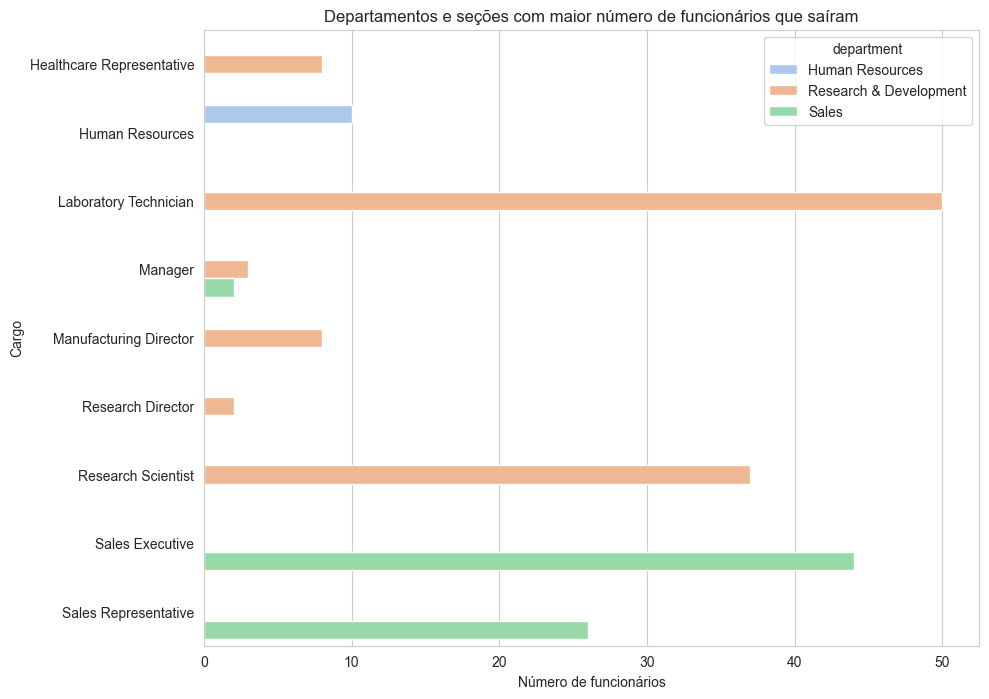

In [44]:
grouped_df = df_attrition.groupby(['department', 'job_role'])['attrition'].count().reset_index()

# Ordenar o DataFrame pela coluna attrition em ordem decrescente
grouped_df = grouped_df.sort_values('attrition', ascending=False)

# Gerar o gráfico de barras horizontais agrupadas
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(10,8))
sns.barplot(x='attrition', y='job_role', hue='department', data=grouped_df)
plt.title('Departamentos e seções com maior número de funcionários que saíram')
plt.xlabel('Número de funcionários')
plt.ylabel('Cargo')
plt.show()

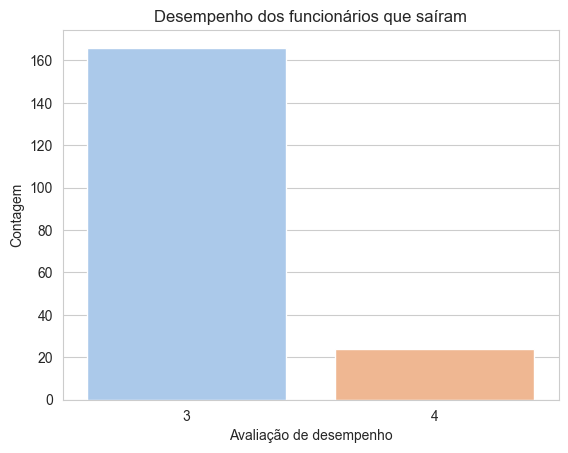

In [45]:
sns.countplot(x='performance_rating', data=df_attrition)
plt.title('Desempenho dos funcionários que saíram')
plt.xlabel('Avaliação de desempenho')
plt.ylabel('Contagem')
plt.show()

Percebe-se que as pessoas que saíram tinham bons desempenhos, talvez saíram para oportunidades mais atraentes

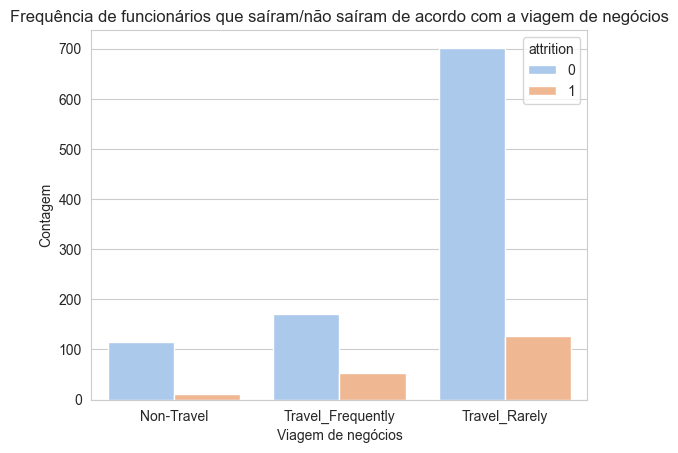

In [46]:
sns.countplot(x='business_travel', hue='attrition', data=df)
plt.title('Frequência de funcionários que saíram/não saíram de acordo com a viagem de negócios')
plt.xlabel('Viagem de negócios')
plt.ylabel('Contagem')
plt.show()

Quanto mais viagens, menor a chance de sair

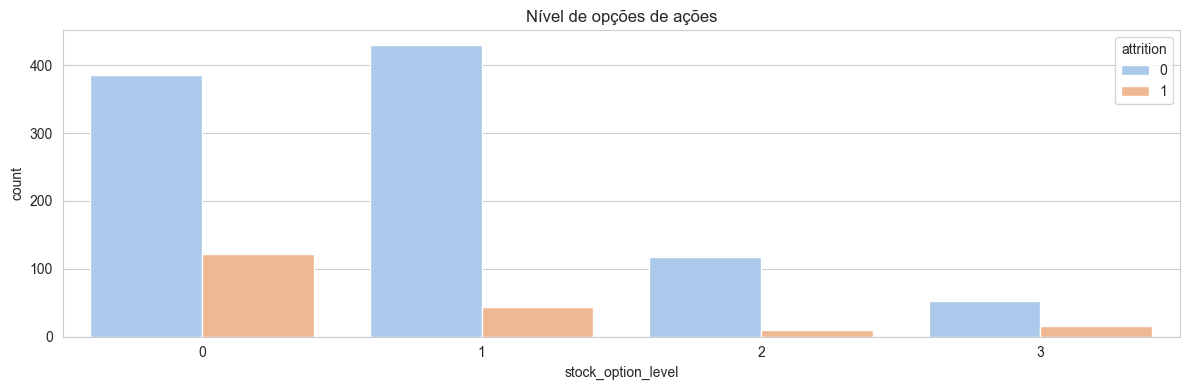

In [47]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 4))

# Criar o gráfico para a coluna 'stock_option_level'
sns.countplot(x='stock_option_level', hue='attrition', data=df, ax=ax)
ax.set_title('Nível de opções de ações')

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

Percebe-se que pessoas que possuem açoes da empresa se demitem menos

In [48]:
df_over_time_yes = df[df['over_time'] == 'Yes']
num_attrition_over_time_yes = df_over_time_yes['attrition'].value_counts()[1]
print('Número de demissões de pessoas que faziam hora extra:', num_attrition_over_time_yes)

Número de demissões de pessoas que faziam hora extra: 101


In [49]:
df_over_time_no = df[df['over_time'] == 'No']
num_attrition_over_time_no = df_over_time_no['attrition'].value_counts()[1]
print('Número de demissões de pessoas que não faziam hora extra:', num_attrition_over_time_no)

Número de demissões de pessoas que não faziam hora extra: 89


#### Correlações

In [50]:
df['gender'] = np.where(
    df.gender =='F',
    0,
    1
)
df['over_time'] = np.where(
    df.over_time == 'Yes',
    1,
    0
)
df['business_travel'] = df.business_travel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})
df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,25,1,685,Research & Development,1,3,Life Sciences,1,1,62,3,2,Manufacturing Director,3,Married,4898,7505,0,0,12,3,4,2,5,3,3,4,2,1,2,0
1,44,1,1376,Human Resources,1,2,Medical,2,1,91,2,3,Human Resources,1,Married,10482,2326,9,0,14,3,4,1,24,1,3,20,6,3,6,1
2,27,1,135,Research & Development,17,4,Life Sciences,4,1,51,3,1,Research Scientist,3,Single,2394,25681,1,1,13,3,4,0,8,2,3,8,2,7,7,1
3,40,2,580,Sales,5,4,Life Sciences,4,1,48,2,3,Sales Executive,1,Married,10475,23772,5,1,21,4,3,1,20,2,3,18,13,1,12,0
4,24,1,477,Research & Development,24,3,Medical,4,1,49,3,1,Laboratory Technician,2,Single,3597,6409,8,0,22,4,4,0,6,2,3,4,3,1,2,0


In [51]:
cols_to_transform = ['department', 'education_field', 'job_role', 'marital_status']

onehotencoder = OneHotEncoder(sparse=False)

transformed = onehotencoder.fit_transform(df[cols_to_transform])
df_transformed = pd.DataFrame(transformed, columns=onehotencoder.get_feature_names(cols_to_transform))

df = pd.concat([df, df_transformed], axis=1)

df.drop(cols_to_transform, axis=1, inplace=True)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [ ]:
corr_to_analysis = []

corr = df.corr(method='pearson')

for item in corr.columns:
    strong_corr = zip(corr[item].abs().sort_values(ascending=False)[1:4].index, corr[item].abs().sort_values(ascending=False)[1:4].values)
    for index, value in strong_corr:
        if value >= 0.75 and ((item, index, value) not in corr_to_analysis and (index, item, value) not in corr_to_analysis):
            corr_to_analysis.append((item, index, value))

In [ ]:
corr.attrition.abs().sort_values(ascending=False)[1:6]